# Directing Customers Through App Behavior Analysis

Source: SuperDataScience - Machine Learning Practical

## Introduction

* In today's market, a lot of companies provide free services in their mobile applications in order, usually for a limited time, in order to attract customers/clients to subscribe in their permium service which includes all features for unlimited time.

* In order to attract the most possible number of these customers, they need to focus on targeting the customers who used the mobile application but didn't subscribe yet for the permium services in order to give them discounts and offers that may not that influential if offered to those who already have the intention to subscribe in all cases.

* We are going to build a model that predicts which users won't subscribe to the paid membership so that the greater marketing efforts can go into trying to convert them to paid users.

## Data

* The [dataset](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P39-CS3-Data.zip) used is a fintech company that wants to provide its customers with a paid mobile app subscription that will allow them to track all of their finances in one place.

* To attract customers, the company releases a free version of their app with some of the main features unlocked. The company wants to identify which users will not likely to enroll in the paid product, so that additional offers can be given to them and not to everybody specially that there will be customers who are going to enroll anyway.

* The dataset contains 50 thousand records (row) each has 12 columns including our target the enrollement status as following:

|        Column        |                                     Description                                     |
|:--------------------:|:-----------------------------------------------------------------------------------:|
|         user         |                                       User ID                                       |
|      first_open      |              The time where the user opened the app for the first time              |
|       dayofweek      |         The index of the day on which the app was opened for the first time         |
|         hour         |               The hour at which the app was opened for the first time               |
|          age         |                                 The age of the user                                 |
|      screen_list     | A comma-separated string of all screens the user showed during the usage of the app |
|      numscreens      |               The number of screens showed during the usage of the app              |
|       minigame       |                   If the user played the mini game (1) or not (0)                   |
|         liked        |                If the user liked the app on the store (1) or not (0)                |
| used_premium_feature |                  If the user used a premium feature (1) or not (0)                  |
|       enrolled       |         If the user actually enrolled in the paid membership (1) or not (0)         |
|     enrolled_date    |              The data on which the user enrolled in the paid membership             |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline

In [2]:
dataset = pd.read_csv("appdata10.csv")
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


## Histograms

We want to visualize some histograms about our features to get a clear overview on them.

We care only in the `hour` column on the hour number itself (0-23), we will take the hour part only of the time and convert it to `int` to use it in plotting.

In [3]:
dataset['hour'] = dataset['hour'].str.slice(1, 3).astype(int)
dataset.hour.head()

0     2
1     1
2    19
3    16
4    18
Name: hour, dtype: int32

We will have a copy of the dataset just if we wanted to modify it for the purpose of visualization. We will take only the numeric columns and drop the other ones.

In [4]:
dataset_hist = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])

In [5]:
dataset_hist.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


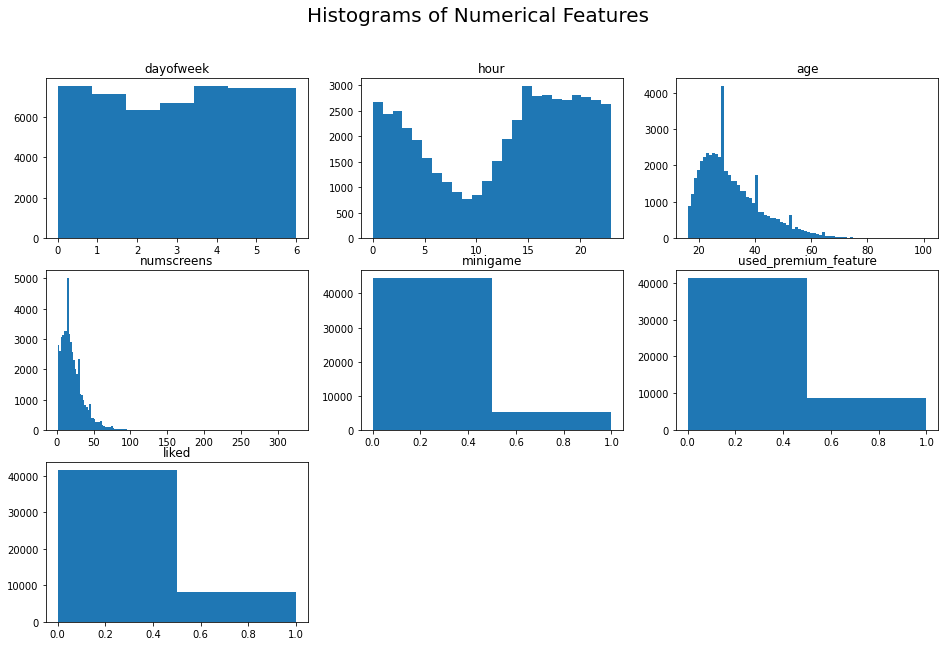

In [6]:
plt.figure(figsize = (16, 10))
plt.suptitle("Histograms of Numerical Features", fontsize = 20)
for i in range(1, dataset_hist.shape[1]+1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset_hist.columns[i-1])
    bins = len(dataset_hist.iloc[:, i-1].unique())
    plt.hist(dataset_hist.iloc[:, i-1], bins=bins)

**Comments on Histograms**

1. `dayofweek`: shows a nearly-even distribuition along all days.
2. `hour`: a huge drop after 2:00 AM until 10:00 AM which is very logic considering the users are probably asleep.
3. `age`: shows that most of users are in the range of 20-40 with sharp peaks at 30 and 40.
4. `numscreens`: a left-tailed distribution with the majority being at 20-30 screen per user.
5. `minigame`: shows that a high skew in the favour of not playing the mini game.
6. `used_premium_feature`: shows that a high skew in the favour of not using the premium features.
7. `liked`: shows that a high skew in the favour of not liking the app on the store.

## Correlation with Target

<AxesSubplot:title={'center':'Correlation with Target `enrolled`'}>

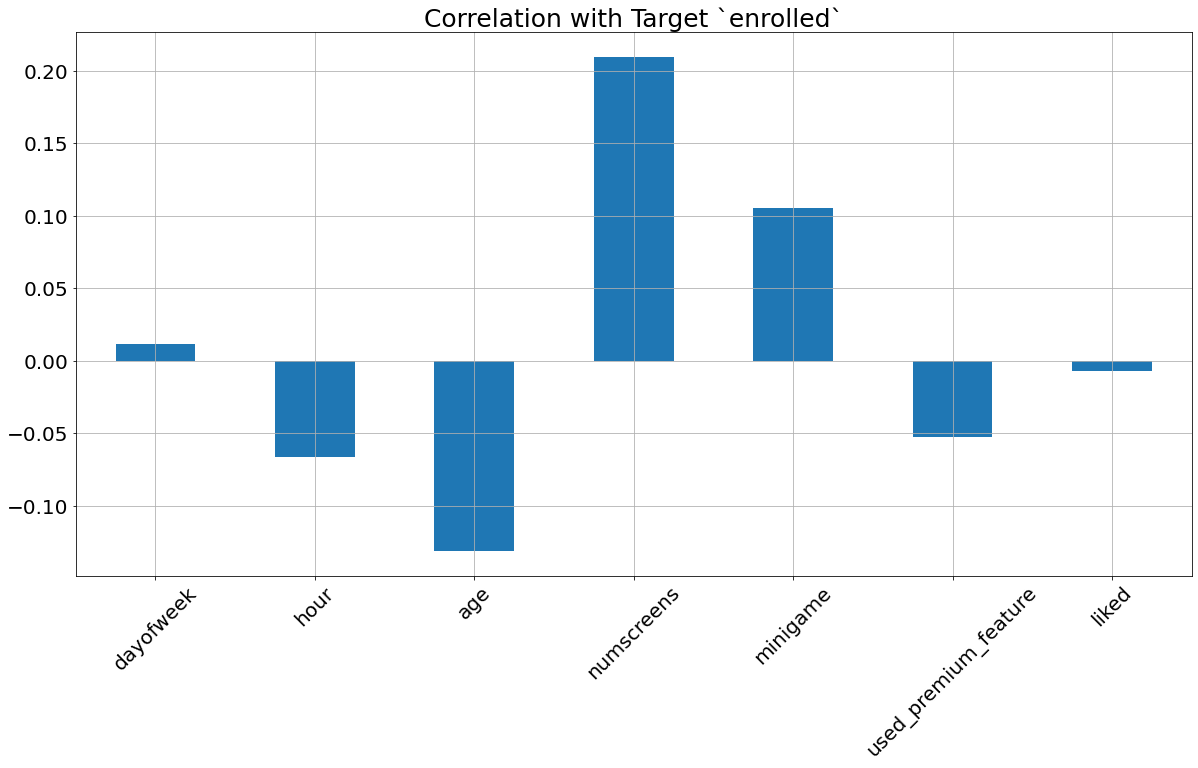

In [7]:
plt.figure(figsize=(20, 10))
plt.title("Correlation with Target `enrolled`", fontsize=25)
dataset_hist.corrwith(dataset.enrolled).plot.bar(
    fontsize = 20, rot = 45, grid = True)


**Comments on the Correlation With the Target**
1. `dayofweek`: as we saw in the histogram, the distribuition was quite even which caused the corrleation between it and the target to be very small.
2. `hour`: the negative correlation means that at earlier hours the possibilty of getting enrolled is higher.
3. `age`: the younger the user the higher possibility to get enrolled.
4. `numscreens`: the more screens the user interact with the higher enrollement probability.
5. `minigame`: the state of playing the mini game increase the possibility of enrollement.
6. `used_premium_feature`: **Surprisingly**, using the premium feature decreases the possibility of enrollement.
7. `liked`:  **Surprisingly**, liking the app decreases the enrollement rate, yet, it's a very small correlation.

## Correlation Matrix

<AxesSubplot:>

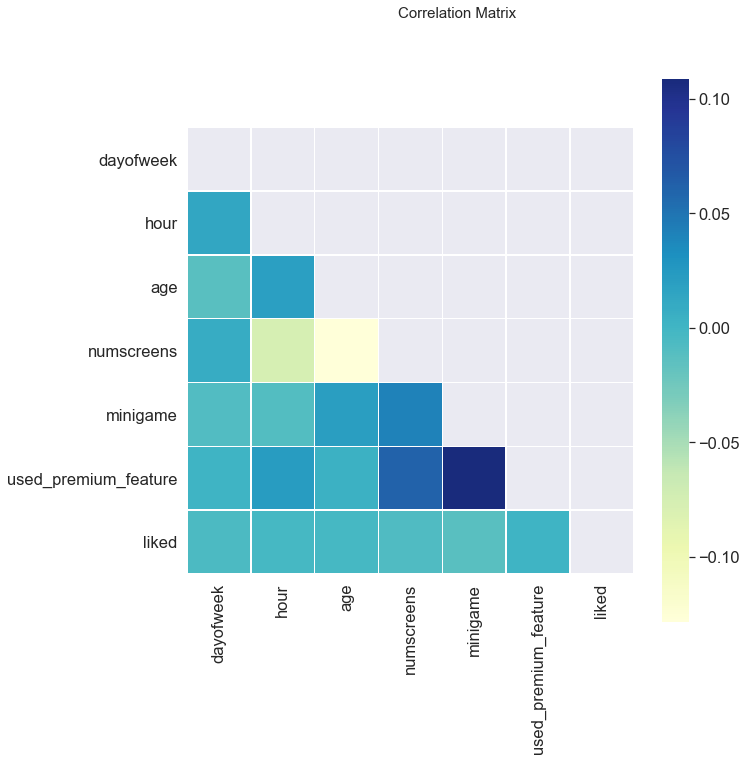

In [8]:
corr_mat = dataset_hist.corr()

mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True # Remove the upper triangle of the correlation matrix and keep the lower.
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 10))
f.suptitle("Correlation Matrix", fontsize = 15)
sns.heatmap(corr_mat, mask=mask, center=0, square=True, linewidth=0.5, cmap="YlGnBu")

**Comments on the Corelation Matrix**
1. No 2 features have a correlation between each other higher than 0.1 in either direction. 
2. The strongest realtionship is between `minigame` and `used_premium_feature`.
3. No need to eliminate any features as no strong linear correlations exist among them.

## Feature Engineering

### Response Time

* In order to make a model that is valid in the future. We need to a set a time limit after which we can look if that customer enrolled or not. We will take that threshold by taking a reasonable time that involves the majority of the customers who enrolled in the membership.

* To calculate the time taken for each customer to response, we will subtract the enrollement time from the first open time.

In [9]:
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]
dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset['enrolled_date']] # the if condition to assure that if the customer isn't enrolled the empty enrolled_date cell doesn't cause problems
dataset['difference'] = (dataset['enrolled_date'] - dataset['first_open']).astype('timedelta64[h]')

In [10]:
sns.set(font_scale = 1)

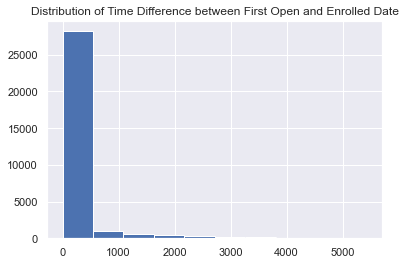

In [11]:
plt.hist(dataset.difference.dropna())
plt.title('Distribution of Time Difference between First Open and Enrolled Date');

We need to zoom in the range between 0 and 500

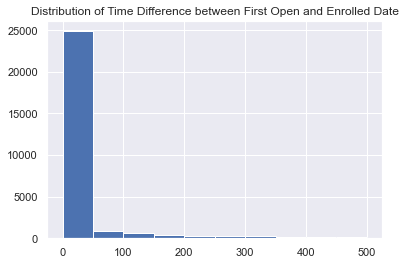

In [12]:
plt.hist(dataset.difference.dropna(), range = [0, 500])
plt.title('Distribution of Time Difference between First Open and Enrolled Date');

More zooming 

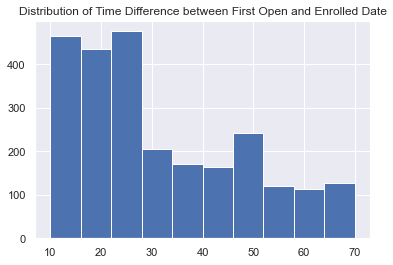

In [13]:
plt.hist(dataset.difference.dropna(), range = [10,70])
plt.title('Distribution of Time Difference between First Open and Enrolled Date');

We will take the time threshold at 48 hours (2 days). After that, the customer will be considered unrolled as we will check the model's performance after 2 days of operating it.

In [14]:
time_threshold = 48

In [15]:
dataset.loc[dataset.difference > time_threshold, 'enrolled'] = 0
dataset.drop(columns = ['difference', 'enrolled_date', 'first_open'], inplace = True)

### Screens

We want to divide the `screen_list` into separated columns each correspond to a specific type of the screens (saving, loans, credit, other)

We have a separate .csv file ('top_screens.csv') that contains the top and most-viewed screens.

In [16]:
top_screens = pd.read_csv('top_screens.csv')['top_screens']
top_screens

0                       Loan2
1                    location
2                Institutions
3            Credit3Container
4                 VerifyPhone
5            BankVerification
6           VerifyDateOfBirth
7                 ProfilePage
8               VerifyCountry
9                       Cycle
10                   idscreen
11           Credit3Dashboard
12                      Loan3
13                CC1Category
14                     Splash
15                       Loan
16                        CC1
17           RewardsContainer
18                    Credit3
19                    Credit1
20                EditProfile
21                    Credit2
22                   Finances
23                        CC3
24                    Saving9
25                    Saving1
26                     Alerts
27                    Saving8
28                   Saving10
29                Leaderboard
30                    Saving4
31               VerifyMobile
32              VerifyHousing
33        

In [17]:
# so that when removing a screen with replace function, the last screen in the string is easy to be removed
dataset.screen_list = dataset.screen_list.astype(str) + ","

In [18]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset.screen_list = dataset.screen_list.str.replace(sc+',', "")

In [19]:
dataset['other'] = dataset.screen_list.str.count(',')
dataset.drop(columns=['screen_list'], inplace=True)

In [20]:
# Saving Screens Group

saving_screens = list("Saving1 Saving2 Saving2Amount Saving4 Saving5 Saving6 Saving7 Saving8 Saving9 Saving10".split())
dataset['saving_screens'] = dataset[saving_screens].sum(axis = 1)

In [21]:
dataset.drop(columns = saving_screens, inplace = True)

In [22]:
# Credit Screens Group

credit_screens = list("Credit1 Credit2 Credit3 Credit3Container Credit3Dashboard".split())
dataset['credit_screens'] = dataset[credit_screens].sum(axis = 1)

In [23]:
dataset.drop(columns = credit_screens, inplace = True)

In [24]:
# CC Screens Group

CC_screens = list("CC1 CC1Category CC3".split())
dataset['CC_screens'] = dataset[CC_screens].sum(axis = 1)

In [25]:
dataset.drop(columns = CC_screens, inplace = True)

In [26]:
# Loans Screens Group

loans_screens = list("Loan Loan2 Loan3 Loan4".split())
dataset['loans_screens'] = dataset[loans_screens].sum(axis = 1)

In [27]:
dataset.drop(columns =loans_screens, inplace = True)

In [28]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'saving_screens', 'credit_screens', 'CC_screens', 'loans_screens'],
      dtype='object')

To use the dataset later if needed without doing all these preprocessing steps..

In [30]:
dataset.to_csv("newappdata10.csv", index = False)

## Data Preprocessing

In [39]:
from sklearn.model_selection import train_test_split

In [46]:
X = dataset.drop(columns = ['user', 'enrolled'])
y = dataset.loc[:, ['enrolled']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Model Building

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [52]:
y_train = np.ravel(y_train)

In [53]:
y_test = np.ravel(y_test)

In [55]:
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [56]:
y_pred = clf.predict(X_test)

In [57]:
confusion_matrix(y_test, y_pred)

array([[3885, 1187],
       [1133, 3795]], dtype=int64)

In [58]:
accuracy_score(y_test, y_pred)

0.768

In [59]:
precision_score(y_test, y_pred)

0.7617422721798475

In [60]:
recall_score(y_test, y_pred)

0.7700892857142857

In [61]:
f1_score(y_test, y_pred)

0.7658930373360243

## Cross Validation

In [62]:
from sklearn.model_selection import cross_val_score

In [70]:
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
acc_mean = accuracies.mean()
acc_std = accuracies.std()
print("Accuracy: {:.2f}(+/- {:.4f})".format(acc_mean, acc_std))

Accuracy: 0.77(+/- 0.0047)
